<a href="https://colab.research.google.com/github/salah32de/HomeWorkProject2/blob/main/Kabache_youcef_salah_eddine_ML_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Customer Segmentation

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly
!pip install seaborn
!pip install kagglehub

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Downloading and Loading the Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)


file_path = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(file_path)


100%|██████████| 1.56k/1.56k [00:00<00:00, 2.68MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shwetabh123/mall-customers/versions/1


# Exploratory Data Analysis (EDA)

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

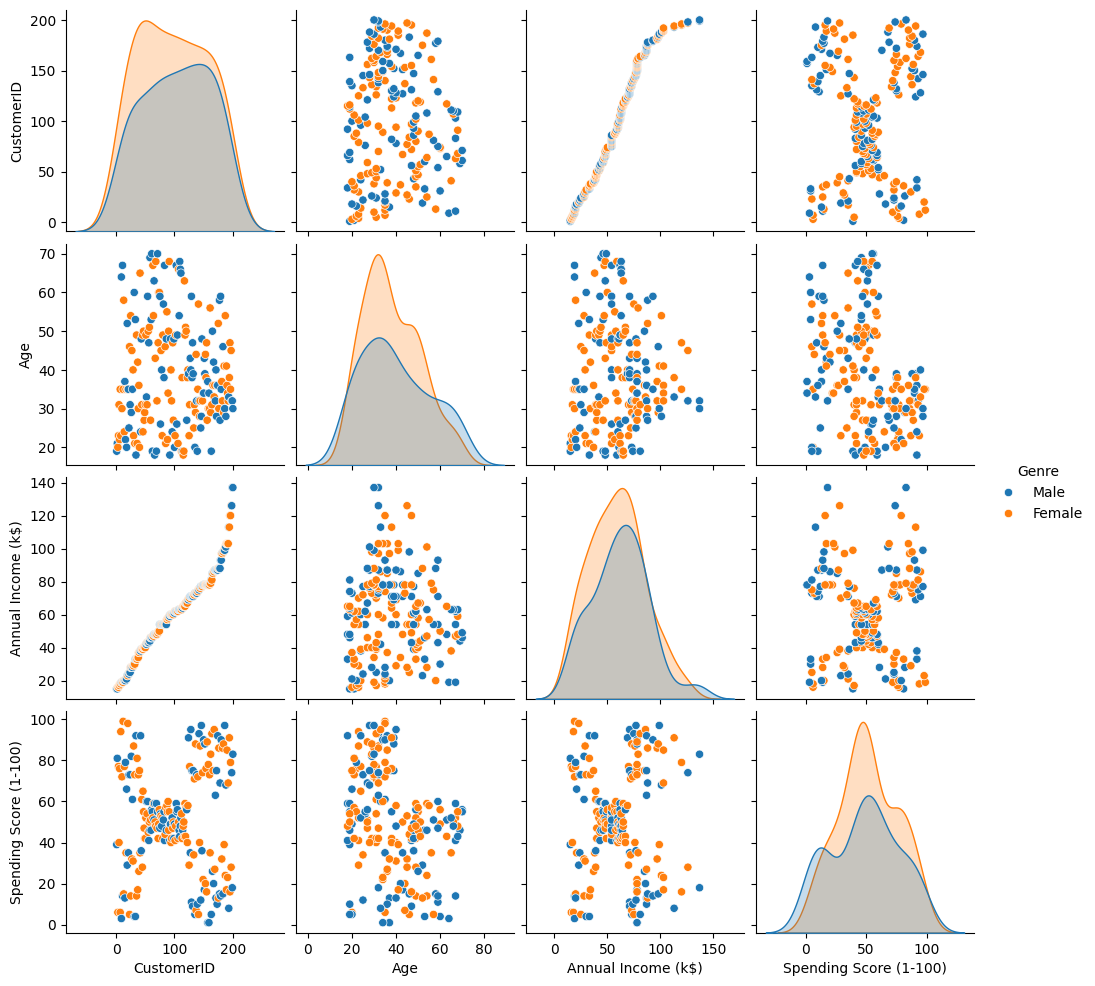

In [3]:
print(df.head())
print(df.info())
print(df.describe())
sns.pairplot(df, hue='Genre')
plt.show()

Data Preprocessing (Feature Selection & Scaling)

In [4]:
df_encoded = df.copy()
df_encoded['Genre'] = df_encoded['Genre'].map({'Male': 0, 'Female': 1})

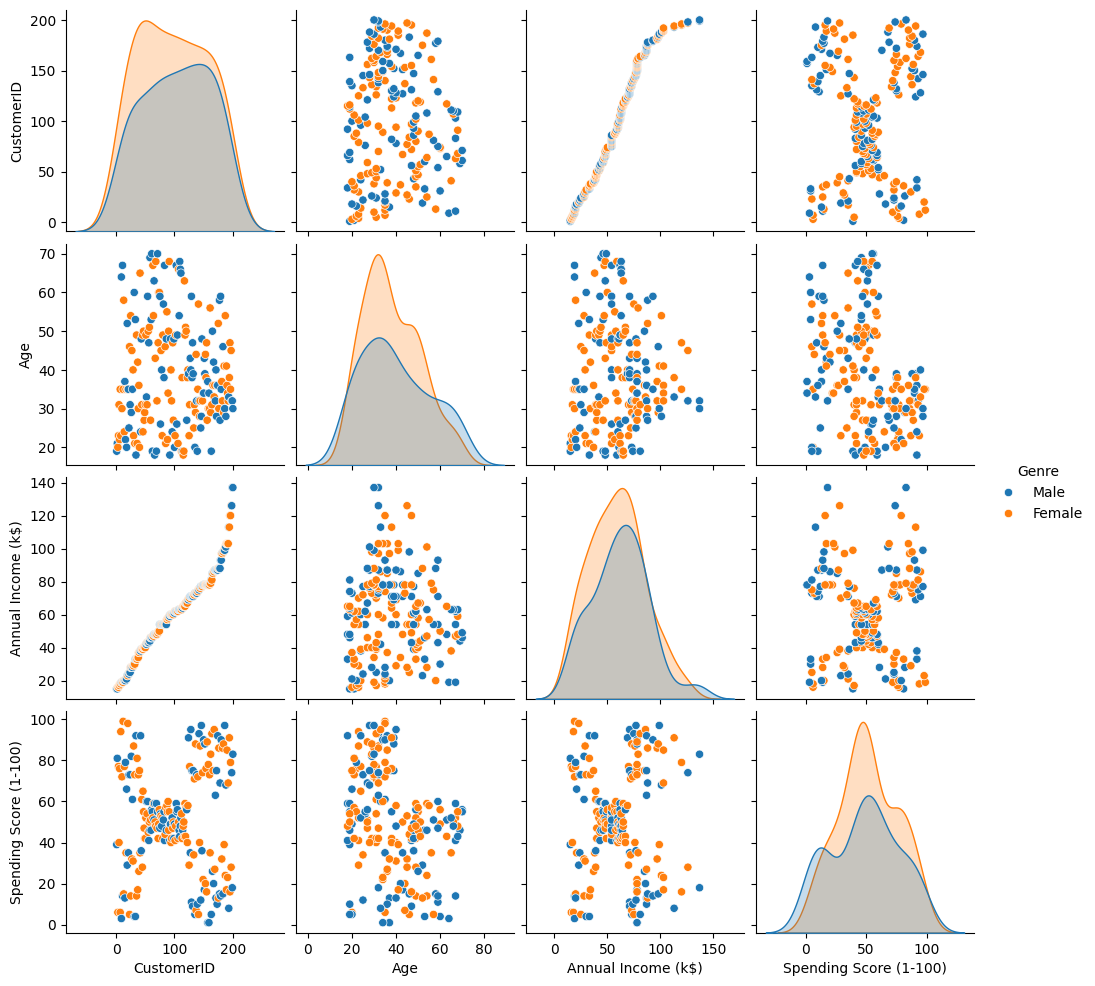

In [5]:
sns.pairplot(df, hue='Genre')
plt.show()

In [6]:
X = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means Clustering

In [8]:
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X_scaled)
  inertia.append(km.inertia_)


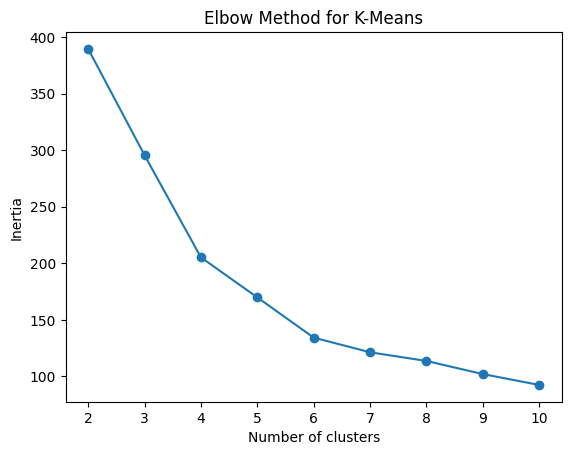

In [10]:
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


print('Silhouette Score (K-Means):', silhouette_score(X_scaled, df['KMeans_Cluster']))

Silhouette Score (K-Means): 0.40846873777345605


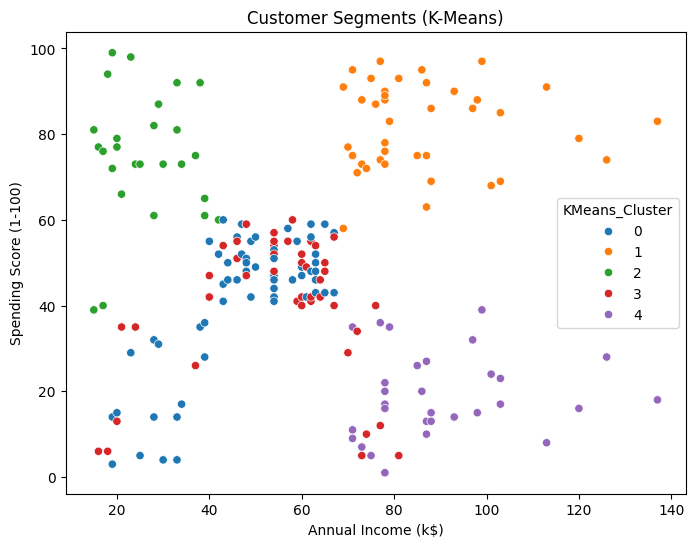

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
x='Annual Income (k$)',
y='Spending Score (1-100)',
hue='KMeans_Cluster',
palette='tab10',
data=df
)
plt.title('Customer Segments (K-Means)')
plt.show()

# DBSCANE Algrithm:

In [13]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [14]:
n_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0)
print('Number of clusters found by DBSCAN:', n_clusters)

Number of clusters found by DBSCAN: 2


In [15]:
if n_clusters > 1:
  print('Silhouette Score (DBSCAN):', silhouette_score(X_scaled, df['DBSCAN_Cluster']))

Silhouette Score (DBSCAN): 0.2543987042290558


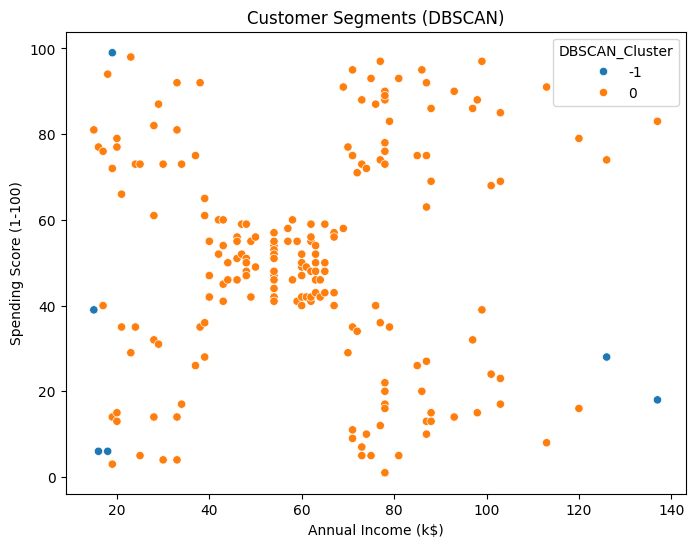

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
x='Annual Income (k$)',
y='Spending Score (1-100)',
hue='DBSCAN_Cluster',
palette='tab10',
data=df
)
plt.title('Customer Segments (DBSCAN)')
plt.show()

In [17]:
cluster_summary = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               55.275862           47.620690               41.706897
1               32.875000           86.100000               81.525000
2               25.769231           26.115385               74.846154
3               26.733333           54.311111               40.911111
4               44.387097           89.774194               18.483871


# Project II :Classification

Introduction:

This module implements a machine learning-based system for detecting fraudulent credit card transactions. The system analyzes transaction patterns and identifies anomalies that may indicate fraudulent activity, helping financial institutions prevent financial losses and protect customers from unauthorized transactions.

Problem Statment:

Credit card fraud is a significant challenge in the financial industry, causing billions in losses annually. The primary difficulties in fraud detection include:
Extreme class imbalance: Legitimate transactions vastly outnumber fraudulent ones (typically 0.1-0.2%)
Real-time detection requirements: Fraud must be detected before transaction completion
Evolving fraud patterns: Fraudsters continuously develop new techniques
False positive minimization: Legitimate transactions should not be incorrectly flagged

Models Implemented:
1. **Logistic Regression** - Baseline model with probability outputs
2. **Random Forest** - Ensemble method for capturing complex patterns
3. **Support Vector Machine** - Effective for high-dimensional data

To import the libraries that will be used in this lab, execute the cells below.


In [18]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, log_loss

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

Load Dataset:


In [19]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())
print(df.describe())

/tmp/ipython-input-638053807.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'creditcardfraud' dataset.
First 5 records:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ...

Dataset Analysis:

Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.
    

We have a dataset that (PCA), so we don't need to calculate matrix correlation and modify our data using StandardScaler; therefore, we use the data directly.

Class
0    284315
1       492
Name: count, dtype: int64


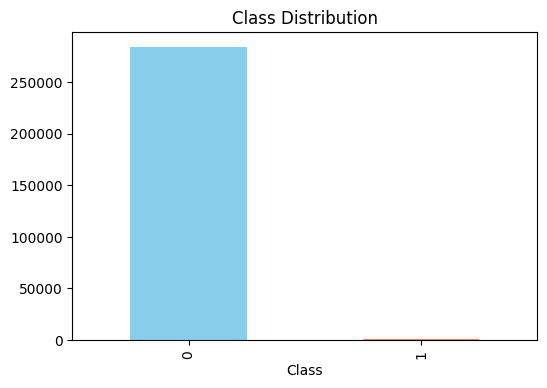

In [20]:
print(df['Class'].value_counts())

plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Class Distribution')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.




Splitting THe Dataset

In [21]:
x=df.drop('Class',axis=1)
y=df['Class']


The trained model has to be tested and evaluated on data which has not been used during training. Therefore, it is required to separate a part of the data for testing and the remaining for training. For this, we may make use of the train_test_split function in the scikit-learn library.

In [22]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

## Logistic Regression Classifier modeling

Let's build the model using __LogisticRegression__ from the Scikit-learn package and fit our model with train data set.


In [23]:
LR = LogisticRegression(class_weight='balanced',random_state=42)
LR.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

 Let us predict the churn parameter for the test data set.

In [24]:
y_pre = LR.predict(X_test)
y_prob = LR.predict_proba(X_test)


Since the purpose here is to predict the 1 class more acccurately, you can also examine what role each input feature has to play in the prediction of the 1 class. Consider the code below.

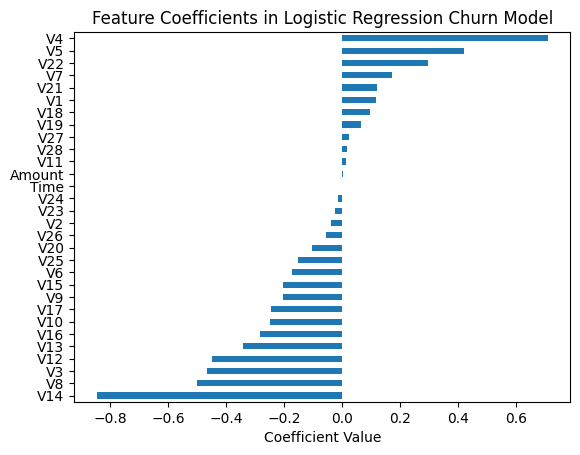

In [25]:
coefficients = pd.Series(LR.coef_[0], index=df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

but because applying PCA in our dataset we cannot understand the effects of features on the outcome and discover the true relationship.

## Performance Evaluation

Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target variable. Let us accuricy score and evaluate the log-loss value.

### log loss

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.

In [26]:

print(' Logistic Regression ')
print("Accuracy:", accuracy_score(y_test, y_pre))
print("Log Loss:", log_loss(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pre))

 Logistic Regression 
Accuracy: 0.9640286506794004
Log Loss: 0.1488303292913471
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56861
           1       0.04      0.95      0.09       101

    accuracy                           0.96     56962
   macro avg       0.52      0.96      0.53     56962
weighted avg       1.00      0.96      0.98     56962



Class
0    56861
1      101
Name: count, dtype: int64


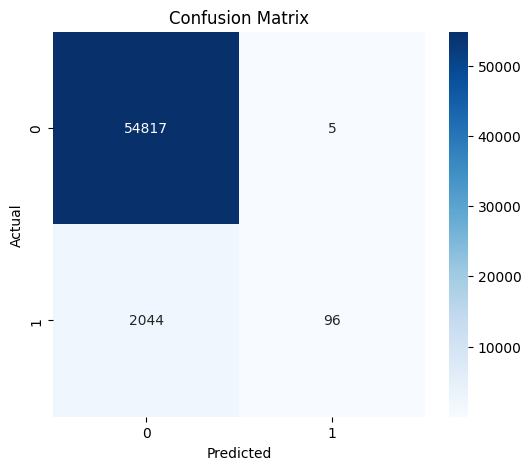

In [27]:
cm=confusion_matrix(y_pre,y_test)
print(y_test.value_counts())
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We observe that the model correctly predicted legitimate transactions. However, in predicting illegitimate transactions, it was correct in most predictions, with 96 successful predictions and only 5 errors. This result was obtained after erring in 2044 legitimate financial transactions and comparing them with illegitimate transactions. Therefore, the model succeeds in identifying illegitimate transactions, but with a high probability of being wrong about them.

## SVM classifier

Let's build the model using __Support Vector Mchine__ from the Scikit-learn package and fit our model with train data set.


In [28]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

 Let us predict the churn parameter for the test data set.

In [29]:
y_pred_svm = svm.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.9982268881008391
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Class
0    56861
1      101
Name: count, dtype: int64


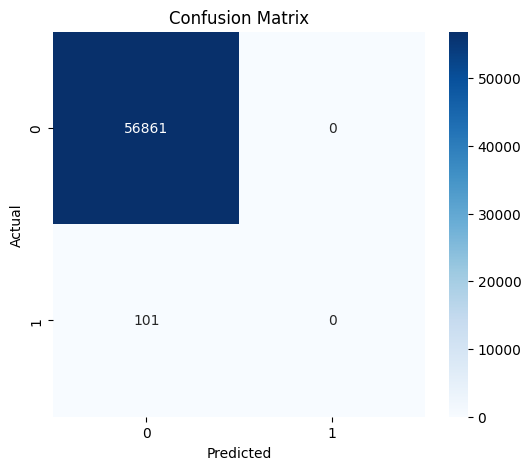

In [31]:
cm=confusion_matrix(y_test,y_pred_svm)
print(y_test.value_counts())
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model completely failed to predict illicit transactions.

## Random Forest Classifier

Let's build the model using __Random Forest Classifier__ from the Scikit-learn package and fit our model with train data set.


In [32]:
n_estimators=100
rf = RandomForestClassifier(class_weight='balanced',n_estimators=n_estimators, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

 Let us predict the churn parameter for the test data set.

In [33]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)


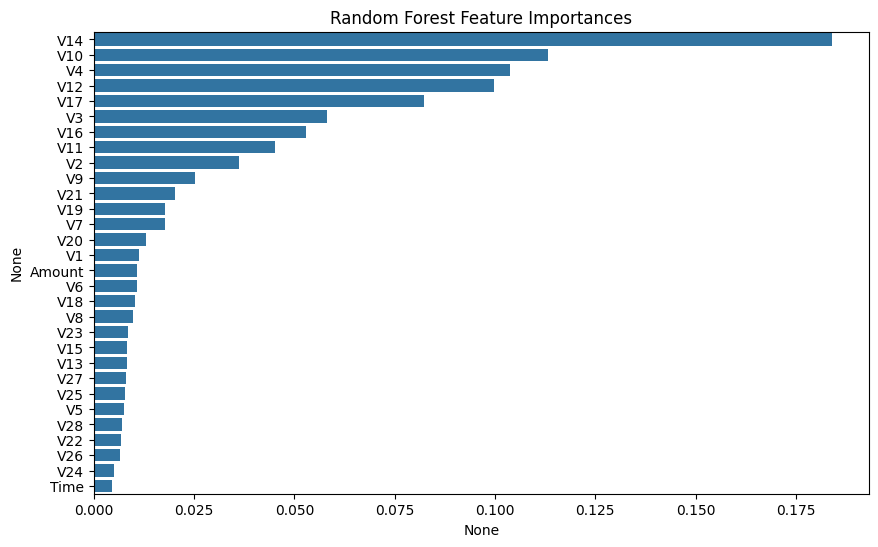

In [34]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.show()

In [35]:

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9995435553526912
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Class
0    56861
1      101
Name: count, dtype: int64


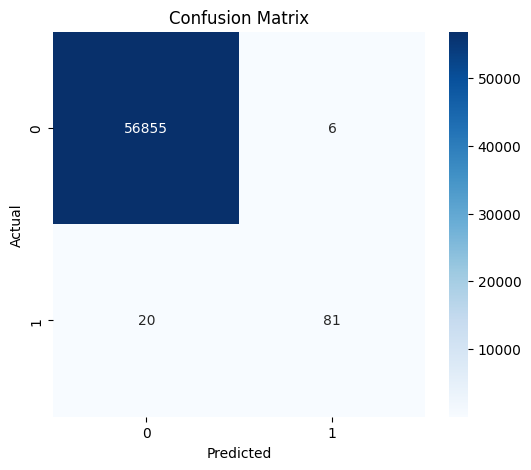

In [36]:
print(y_test.value_counts())
cm= confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model is good at detecting illegitimate transactions, successfully identifying 81 out of 101 fraudulent transactions with errors in only 20 transactions. Therefore, the model identifies fraudulent transactions with a lower error rate.

## Conclusion

Based on the experimental results, the Random Forest Model and the Logistic Regression Model were selected as reliable models for detecting fraudulent transactions, as follows:

Logistic regression can be used to predict illicit transactions, but with a high margin of error.

The Random Forest Model can detect illicit transactions more accurately than logistic regression, but with a margin of error that causes it to fail to predict some illicit transactions.

The SVM model was excluded because it completely failed to identify illicit transactions.

# III) Mini State-of-the-Art on AutoML

**1. What is AutoML and its Importance**

Definition: AutoML (Automated Machine Learning) is a set of techniques and tools that automates the key steps of the machine learning process, including feature preprocessing, model selection, hyperparameter tuning, and evaluation.

***Importance:***

Reduces the time and expertise needed to build a high-performing model.

Enables non-experts to create competitive models.

Facilitates rapid experimentation with different models, pipelines, and hyperparameters.

**2. TPOT and Auto-sklearn: **Functioning, Advantages, and Limitations

TPOT (Tree-based Pipeline Optimization Tool)

How it Works: **bold text**

Uses genetic algorithms to automatically explore different ML pipelines.

Combines data preprocessing, feature selection, model selection, and hyperparameter optimization.

Evaluates each pipeline using a chosen score metric (e.g., F1-score).

**Advantages:**

Generates ready-to-use pipelines.

Can find unexpected but effective combinations of transformations and models.

Limitations:

Can be slow for large datasets.

Less flexible if fine control over the pipeline is needed.

Auto-sklearn

How it Works:

Uses Bayesian optimization and ensemble methods to select the best model and its hyperparameters.

Includes a library of preprocessing steps and classic scikit-learn models.

Advantages:

Very effective for tabular datasets.

Automatically creates model ensembles for more robust predictions.

Limitations:

Can require a lot of memory and time for large datasets.

The resulting pipeline may be less interpretable.

# IV) Applying AutoML on Project 2

Running TPOT or Auto-sklearn to Generate a Pipeline

Example with TPOT:

In [20]:
!pip install tpot --quiet


In [13]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
x=df.drop('Class',axis=1)
y = df['Class']

/tmp/ipython-input-4259966507.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'creditcardfraud' dataset.


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [34]:
from tpot import TPOTClassifier
print(X_train.shape, y_train.shape)

tpot = TPOTClassifier(
    generations=3,
    population_size=3,
    random_state=42,
    n_jobs=1
)

tpot.fit(X_train[:10000], y_train[:10000])
print("Best pipeline:", tpot.fitted_pipeline_)

(227845, 30) (227845,)


/usr/local/lib/python3.12/dist-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/usr/local/lib/python3.12/dist-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 32873 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:46489
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:32873/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39503'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:38907 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38907
INFO:dis

Best pipeline: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('rfe',
                 RFE(estimator=ExtraTreesClassifier(bootstrap=np.False_,
                                                    criterion=np.str_('gini'),
                                                    max_features=0.4503212524738,
                                                    min_samples_leaf=4,
                                                    min_samples_split=7,
                                                    n_jobs=1, random_state=42),
                     step=0.9162776237062)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[(...
                               feature_types=None, feature_weights=None,
                               gamma=0.0153706668713, grow_policy=None,
                               importance_type=None,
                        

Compare Performance with Manual Model

Evaluate on the test set and compare accuracy, precision, recall, and F1-score:

In [35]:
from sklearn.metrics import classification_report

y_pred = tpot.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[56864     0]
 [   98     0]]


**the model autoML fialed in found uniligimate**